[1] **Explain the differences between AI, ML, Deep Learning (DL), and Data Science (DS).**

=>

1. Artificial Intelligence (AI)

* Definition: AI is the broadest field — it’s about making machines simulate human intelligence (reasoning, learning, problem-solving, decision-making).

* Purpose: To create systems that can act intelligently.

* Examples:

  Chatbots like me (AI assistants)

  Self-driving cars

2. Machine Learning (ML)

* Definition: ML is a subset of AI that focuses on systems that can learn from data without being explicitly programmed.

* Purpose: Improve performance on a task as more data is given.

* Examples:

  Spam email filtering

  Predicting stock prices

 3. Deep Learning (DL)

* Definition: DL is a subset of ML that uses artificial neural networks with many layers (hence “deep”).

* Purpose: Handle very large and complex datasets, especially images, audio, text, video.

* Examples:

  Face recognition on Facebook

  Voice assistants (Alexa, Siri, Google Assistant)




[2] **What are the types of machine learning? Describe each with one
real-world example.**

=> Machine Learning (ML) is usually classified into three main types (plus a 4th emerging one).

1. Supervised Learning

* Definition: The model learns from labeled data (input → output is known).

* Goal: Predict outcomes for new, unseen inputs.

2. Unsupervised Learning

* Definition: The model learns from unlabeled data (no predefined outputs).

* Goal: Discover hidden patterns, groupings, or structures.

3. Reinforcement Learning (RL)

* Definition: The model (called an agent) learns by interacting with an environment and receiving rewards or penalties.

* Goal: Maximize long-term rewards through trial and error.

4. Semi-Supervised Learning (Hybrid)

* Definition: Uses a small amount of labeled data + a large amount of unlabeled data.

* Goal: Improve learning accuracy when labeling data is expensive/difficult.

[3] **Define overfitting, underfitting, and the bias-variance tradeoff in machine
learning.**

=>

1. Overfitting

* Definition: Overfitting happens when a machine learning model learns the training data too well, including its noise and random fluctuations.

* Example: A decision tree that keeps splitting until every training sample is perfectly classified (too complex, memorizing instead of learning patterns).

2. Underfitting

* Definition: Underfitting occurs when a model is too simple to capture the underlying patterns in the data.

* Example: Using a straight line (linear regression) to fit highly nonlinear data.

3. Bias-Variance Tradeoff

* Bias: Error due to wrong assumptions or oversimplification in the model.

  High bias → underfitting.

* Variance: Error due to model sensitivity to small fluctuations in the training data.

  High variance → overfitting.

* Tradeoff:

  A good model finds the right balance between bias and variance.

  Too simple → high bias, low variance (underfitting).

  Too complex → low bias, high variance (overfitting).


[4] **What are outliers in a dataset, and list three common techniques for
handling them.**

=>

Outliers

* Definition: Outliers are data points that significantly differ from the majority of the data.

* They may occur due to measurement errors, data entry mistakes, or genuine rare events.

* Outliers can skew statistical measures (like mean, variance) and negatively affect model performance.

Three Common Techniques for Handling Outliers:

1. Removal (Deleting Outliers)

  If outliers are due to errors or irrelevant anomalies, they can be removed.

2. Transformation / Winsorization

  Apply mathematical transformations (e.g., log, square root) to reduce the impact.

3. Imputation / Replacement

  Replace outliers with mean, median, or a fixed boundary value.


[5] **Explain the process of handling missing values and mention one
imputation technique for numerical and one for categorical data.**

=>

Process of Handling Missing Values

1. Identify Missing Values

* Use methods like .isnull() in Pandas to check missing data.

* Visualize with heatmaps or bar plots (e.g., Seaborn, missingno library).

2. Understand the Reason

* Missing Completely at Random (MCAR): No pattern.

* Missing at Random (MAR): Depends on other features.

* Missing Not at Random (MNAR): Depends on the missing value itself.

3. Choose a Strategy

* Delete rows/columns (only if missingness is very high and data is not useful).

* Impute (fill in) values using appropriate techniques.

Imputation Techniques

1. For Numerical Data:

* Mean/Median Imputation → Replace missing values with the column’s mean or median.

* Example: Filling missing ages in a dataset with the median age.

2. For Categorical Data:

* Mode Imputation → Replace missing values with the most frequent category.

* Example: Filling missing "Gender" values with the most common value (“Male” or “Female”).


In [ ]:
#Answer of [6]

from sklearn.datasets import make_classification
import numpy as np
from collections import Counter

# Create synthetic imbalanced dataset
X, y = make_classification(
    n_samples=1000,       # total samples
    n_features=10,        # number of features
    n_informative=5,      # number of informative features
    n_redundant=2,        # number of redundant features
    n_classes=2,          # binary classification
    weights=[0.9, 0.1],   # imbalance ratio (90% vs 10%)
    random_state=42
)

# Print class distribution
class_distribution = Counter(y)
print("Class Distribution:", class_distribution)

# Alternatively, calculate percentages
for cls, count in class_distribution.items():
    print(f"Class {cls}: {count} samples ({count/len(y)*100:.2f}%)")


Class Distribution: Counter({np.int64(0): 896, np.int64(1): 104})
Class 0: 896 samples (89.60%)
Class 1: 104 samples (10.40%)


In [ ]:
#Answer of [7]

import pandas as pd

# List of colors
colors = ['Red', 'Green', 'Blue', 'Green', 'Red']

# Create DataFrame
df = pd.DataFrame({'Color': colors})

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Color'])

# Print the resulting DataFrame
print(df_encoded)


   Color_Blue  Color_Green  Color_Red
0       False        False       True
1       False         True      False
2        True        False      False
3       False         True      False
4       False        False       True


/tmp/ipython-input-2633205219.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Value'].fillna(mean_value, inplace=True)


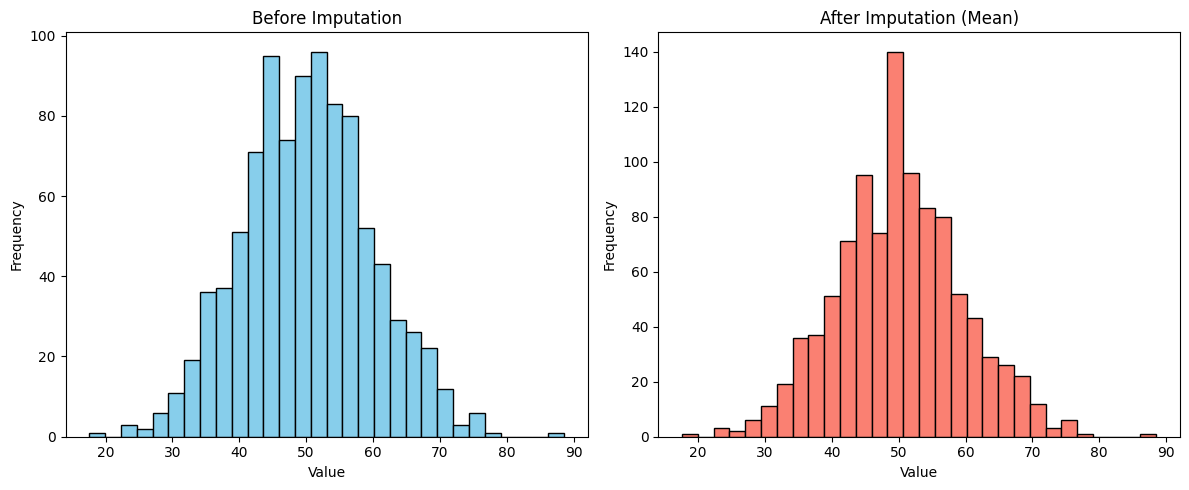

In [ ]:
#Answer of [8]

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Generate 1000 samples from a normal distribution
np.random.seed(42)  # for reproducibility
data = np.random.normal(loc=50, scale=10, size=1000)  # mean=50, std=10

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Value'])

# 2. Introduce 50 random missing values
missing_indices = np.random.choice(df.index, size=50, replace=False)
df.loc[missing_indices, 'Value'] = np.nan

# Save a copy for plotting before imputation
df_before = df.copy()

# 3. Fill missing values with the column mean
mean_value = df['Value'].mean()
df['Value'].fillna(mean_value, inplace=True)

# 4. Plot histograms before and after imputation
plt.figure(figsize=(12,5))

# Before imputation
plt.subplot(1,2,1)
plt.hist(df_before['Value'], bins=30, color='skyblue', edgecolor='black')
plt.title("Before Imputation")
plt.xlabel("Value")
plt.ylabel("Frequency")

# After imputation
plt.subplot(1,2,2)
plt.hist(df['Value'], bins=30, color='salmon', edgecolor='black')
plt.title("After Imputation (Mean)")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [ ]:
#Answer of [9]

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Original data
data = np.array([2, 5, 10, 15, 20]).reshape(-1, 1)

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform
scaled_data = scaler.fit_transform(data)

# Print result
print("Original Data:\n", data.flatten())
print("Scaled Data:\n", scaled_data.flatten())


Original Data:
 [ 2  5 10 15 20]
Scaled Data:
 [0.         0.16666667 0.44444444 0.72222222 1.        ]


[10] **Answer**

Explanation of Each Step

1. Missing Values:

* Age → median imputation

* PaymentMethod → mode imputation

2. Outliers:

* Capped extreme TransactionAmount using IQR method.

3. Categorical Encoding:

* One-hot encoding for PaymentMethod.

4. Scaling:

* Min-Max scaling for Age and TransactionAmount.

5. Imbalanced Target:

* Used SMOTE to oversample minority class (Fraud).

6. Train/Test Split:

* Stratified to maintain class distribution.

In [1]:
#Missing Ages

import pandas as pd
import numpy as np

# Sample dataset with missing ages
data = {
    'CustomerID': [101, 102, 103, 104, 105, 106],
    'Age': [25, np.nan, 40, np.nan, 35, 29],
    'TransactionAmount': [200, 150, 300, 500, 250, 100]
}

df = pd.DataFrame(data)
print("Original Data:\n", df)

# ---- Method 1: Fill missing ages with median ----
df['Age_median'] = df['Age'].fillna(df['Age'].median())

# ---- Method 2: Fill missing ages with mean ----
df['Age_mean'] = df['Age'].fillna(df['Age'].mean())

# ---- Method 3: Fill missing ages with forward fill (previous value) ----
df['Age_ffill'] = df['Age'].fillna(method='ffill')

# ---- Method 4: Fill missing ages with interpolation ----
df['Age_interp'] = df['Age'].interpolate()

print("\nAfter Handling Missing Ages:\n", df)


Original Data:
    CustomerID   Age  TransactionAmount
0         101  25.0                200
1         102   NaN                150
2         103  40.0                300
3         104   NaN                500
4         105  35.0                250
5         106  29.0                100

After Handling Missing Ages:
    CustomerID   Age  TransactionAmount  Age_median  Age_mean  Age_ffill  \
0         101  25.0                200        25.0     25.00       25.0   
1         102   NaN                150        32.0     32.25       25.0   
2         103  40.0                300        40.0     40.00       40.0   
3         104   NaN                500        32.0     32.25       40.0   
4         105  35.0                250        35.0     35.00       35.0   
5         106  29.0                100        29.0     29.00       29.0   

   Age_interp  
0        25.0  
1        32.5  
2        40.0  
3        37.5  
4        35.0  
5        29.0  


/tmp/ipython-input-2646206618.py:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Age_ffill'] = df['Age'].fillna(method='ffill')


In [3]:
#Outliers in transaction amount

import pandas as pd
import numpy as np

# Sample dataset with outliers
data = {
    'CustomerID': [101, 102, 103, 104, 105, 106, 107],
    'TransactionAmount': [200, 220, 250, 270, 10000, 260, 230]  # 10000 is an outlier
}

df = pd.DataFrame(data)
print("Original Data:\n", df)

# ---- Detect outliers using IQR ----
Q1 = df['TransactionAmount'].quantile(0.25)
Q3 = df['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flagging outliers
df['Outlier'] = ((df['TransactionAmount'] < lower_bound) |
                 (df['TransactionAmount'] > upper_bound))

print("\nOutliers Detected:\n", df)

# ---- Handle outliers ----
# Option 1: Remove them
df_removed = df[~df['Outlier']]

# Option 2: Cap them (winsorization)
df_capped = df.copy()
df_capped['TransactionAmount'] = np.where(
    df_capped['TransactionAmount'] > upper_bound, upper_bound,
    np.where(df_capped['TransactionAmount'] < lower_bound, lower_bound, df_capped['TransactionAmount'])
)

print("\nData after Capping Outliers:\n", df_capped)

Original Data:
    CustomerID  TransactionAmount
0         101                200
1         102                220
2         103                250
3         104                270
4         105              10000
5         106                260
6         107                230

Outliers Detected:
    CustomerID  TransactionAmount  Outlier
0         101                200    False
1         102                220    False
2         103                250    False
3         104                270    False
4         105              10000     True
5         106                260    False
6         107                230    False

Data after Capping Outliers:
    CustomerID  TransactionAmount  Outlier
0         101              200.0    False
1         102              220.0    False
2         103              250.0    False
3         104              270.0    False
4         105              325.0     True
5         106              260.0    False
6         107              230.0    Fa

In [4]:
#A highly imbalanced target (fraud vs. non-fraud)

import pandas as pd
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter

# ---- Step 1: Create sample imbalanced dataset ----
X, y = make_classification(n_samples=1000, n_features=5, n_informative=3,
                           n_redundant=0, weights=[0.95, 0.05], random_state=42)

df = pd.DataFrame(X, columns=[f'Feature{i}' for i in range(1, 6)])
df['Fraud'] = y

print("Original target distribution:", Counter(y))

# ---- Step 2: Apply SMOTE to balance classes ----
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("After SMOTE target distribution:", Counter(y_resampled))

# ---- Step 3: Convert back to DataFrame ----
df_resampled = pd.DataFrame(X_resampled, columns=[f'Feature{i}' for i in range(1, 6)])
df_resampled['Fraud'] = y_resampled

print("\nBalanced Dataset Sample:\n", df_resampled.head())


Original target distribution: Counter({np.int64(0): 944, np.int64(1): 56})
After SMOTE target distribution: Counter({np.int64(0): 944, np.int64(1): 944})

Balanced Dataset Sample:
    Feature1  Feature2  Feature3  Feature4  Feature5  Fraud
0 -0.529332 -0.093387 -1.526572  0.406847 -0.619699      0
1 -0.978500 -1.690672 -2.175214 -0.995289  0.493251      0
2 -2.171571  0.545787 -0.244730 -0.129407 -1.474666      0
3 -0.151299 -0.365506  1.390122  0.850257 -1.404234      0
4 -0.777371  1.146030 -2.479343  0.297014  1.518522      0


In [5]:
#Categorical variables like payment method

import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# ---- Sample dataset ----
data = {
    'CustomerID': [101, 102, 103, 104, 105],
    'PaymentMethod': ['CreditCard', 'DebitCard', 'UPI', 'Cash', 'CreditCard'],
    'TransactionAmount': [200, 150, 300, 500, 250]
}

df = pd.DataFrame(data)
print("Original Data:\n", df)

# ---- Method 1: One-Hot Encoding using pandas ----
df_onehot = pd.get_dummies(df, columns=['PaymentMethod'], prefix='PM')
print("\nAfter One-Hot Encoding:\n", df_onehot)

# ---- Method 2: One-Hot Encoding using scikit-learn ----
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[['PaymentMethod']])

df_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['PaymentMethod']))
df_final = pd.concat([df.drop('PaymentMethod', axis=1), df_encoded], axis=1)
print("\nAfter sklearn One-Hot Encoding:\n", df_final)

# ---- Method 3: Label Encoding (not recommended for unordered categories) ----
le = LabelEncoder()
df['PaymentMethod_Label'] = le.fit_transform(df['PaymentMethod'])
print("\nAfter Label Encoding:\n", df)


Original Data:
    CustomerID PaymentMethod  TransactionAmount
0         101    CreditCard                200
1         102     DebitCard                150
2         103           UPI                300
3         104          Cash                500
4         105    CreditCard                250

After One-Hot Encoding:
    CustomerID  TransactionAmount  PM_Cash  PM_CreditCard  PM_DebitCard  PM_UPI
0         101                200    False           True         False   False
1         102                150    False          False          True   False
2         103                300    False          False         False    True
3         104                500     True          False         False   False
4         105                250    False           True         False   False

After sklearn One-Hot Encoding:
    CustomerID  TransactionAmount  PaymentMethod_Cash  \
0         101                200                 0.0   
1         102                150                 0.0   
